<h1>Rodrigo Torres. C.I: 31.014.592 & Cristian Guevara. C.I: 31.567.525</h1>


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('model.txt', skiprows=3, sep=r'\s+')

In [45]:
df.head()

,YYYYMMDD,HHMM,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
0,19840101,0,20.8,243,7.3,1.25,1002.8,0.04,86.3
1,19840101,100,20.8,243,7.3,1.25,1002.2,0.04,86.9
2,19840101,200,20.6,243,7.4,1.24,1001.8,0.04,87.0
3,19840101,300,20.4,244,7.5,1.24,1001.5,0.05,86.2
4,19840101,400,20.3,245,7.5,1.24,1001.2,0.05,85.6


<h3>1.- Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros.</h3>

array([[<Axes: xlabel='M(m/s)', ylabel='M(m/s)'>,
        <Axes: xlabel='D(deg)', ylabel='M(m/s)'>],
       [<Axes: xlabel='M(m/s)', ylabel='D(deg)'>,
        <Axes: xlabel='D(deg)', ylabel='D(deg)'>]], dtype=object)

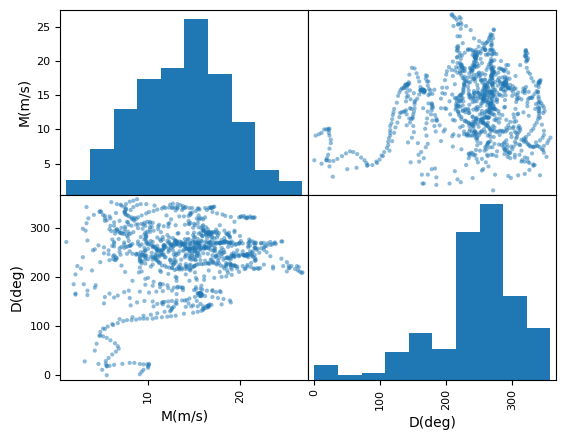

In [46]:
#Código para el 1er ejercicio
pd.plotting.scatter_matrix(df.loc[df.index[:1000], 'M(m/s)':'D(deg)'])



<h3>2.- Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados.</h3>

array([[<Axes: xlabel='M(m/s)', ylabel='M(m/s)'>,
        <Axes: xlabel='D(deg)', ylabel='M(m/s)'>],
       [<Axes: xlabel='M(m/s)', ylabel='D(deg)'>,
        <Axes: xlabel='D(deg)', ylabel='D(deg)'>]], dtype=object)

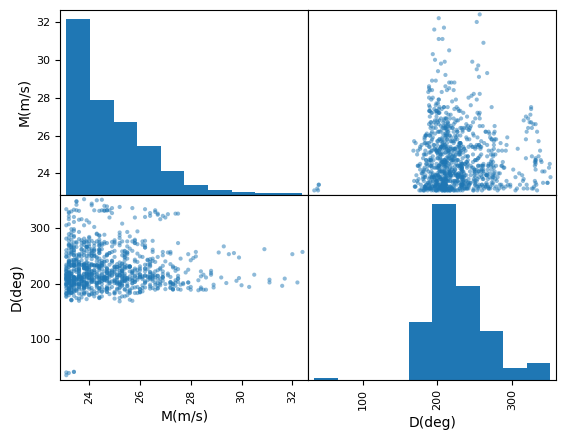

In [47]:
#Código para el 2do ejercicio
pd.plotting.scatter_matrix(
    df.loc[df.sort_values('M(m/s)', ascending=False).index[:1000],
            'M(m/s)':'D(deg)']
)

<h3>3.- Histograma de la velocidad del viento con 36 particiones.</h3>

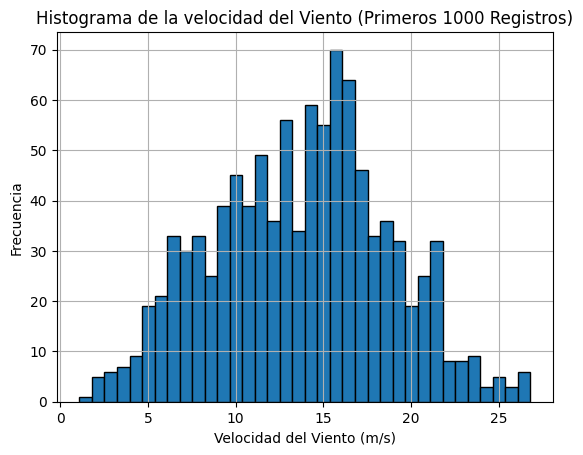

In [48]:
#Código para el 3er ejercicio
column_names = ['Fecha', 'Hora', 'Velocidad_viento', 'Direccion_viento', 'Temperatura', 'Densidad', 'Presion', 'RiNumber', 'Humedad']
df = pd.read_csv('model.txt', skiprows=4, sep=r'\s+', names=column_names)
data_first_1000 = df.head(1000)
plt.hist(data_first_1000['Velocidad_viento'], bins=36, edgecolor='black')
plt.xlabel('Velocidad del Viento (m/s)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la velocidad del Viento (Primeros 1000 Registros)')
plt.grid(True)
plt.show()

<h3>4.- Histórico de la velocidad media, con los datos agrupados por años y meses.</h3>

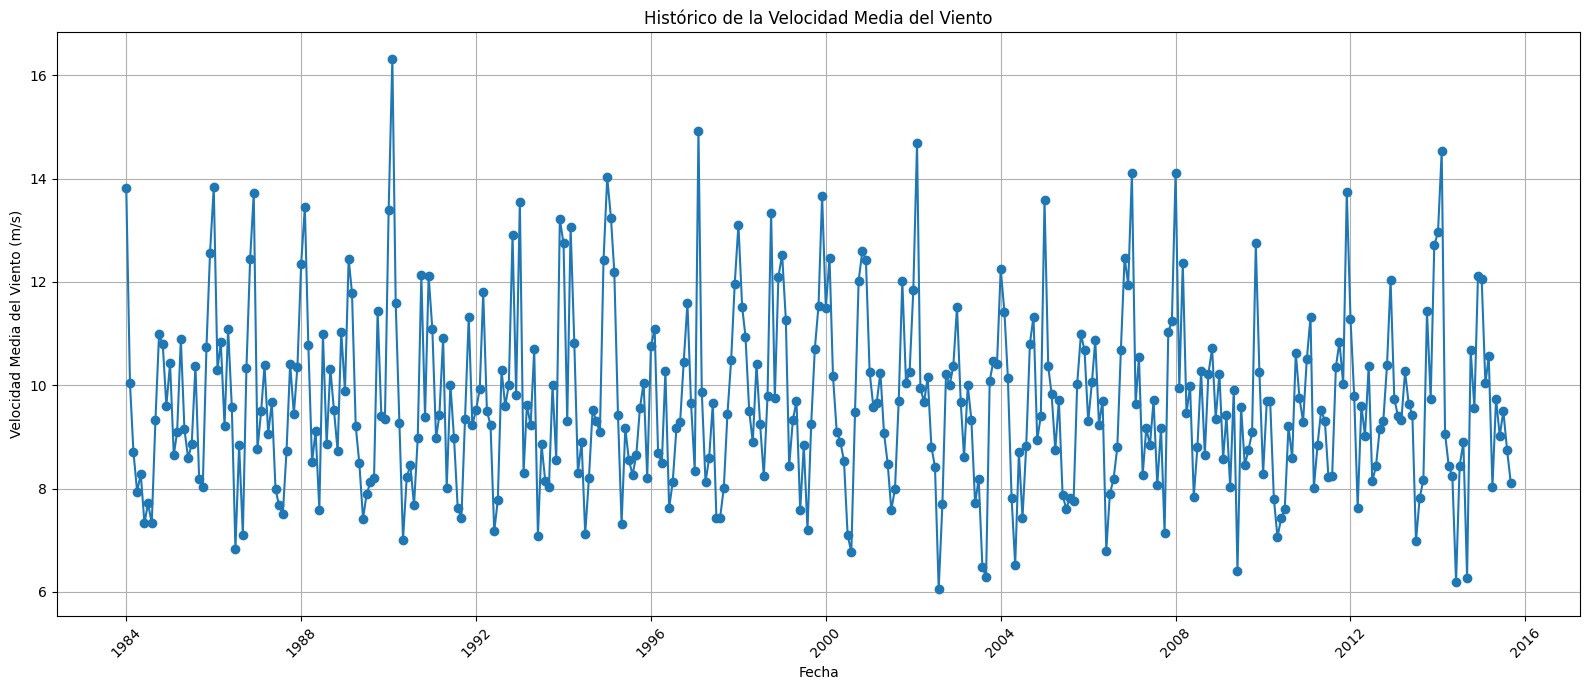

In [49]:
#Código para el 4to ejercicio

# Crear una columna de fecha y hora combinada
df['FechaHora'] = pd.to_datetime(df['Fecha'].astype(str) + ' ' + df['Hora'].astype(str).str.zfill(4), format='%Y%m%d %H%M')

# Agrupar los datos por año y mes y calcular la velocidad media del viento
df['AñoMes'] = df['FechaHora'].dt.to_period('M')
velocidad_media = df.groupby('AñoMes')['Velocidad_viento'].mean().reset_index()

# Convertir 'AñoMes' a un formato datetime para facilitar la representación gráfica
velocidad_media['AñoMes'] = velocidad_media['AñoMes'].dt.to_timestamp()

# Crear el gráfico histórico de la velocidad media del viento
plt.figure(figsize=(16, 7))
plt.plot(velocidad_media['AñoMes'], velocidad_media['Velocidad_viento'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Velocidad Media del Viento (m/s)')
plt.title('Histórico de la Velocidad Media del Viento')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>5.- Tabla de velocidades medias en función del año (filas) y del mes (columnas).</h3>

In [50]:
#Código para el 5to ejercicio

df['FechaHora'] = pd.to_datetime(df['Fecha'].astype(str) + ' ' + df['Hora'].astype(str).str.zfill(4), format='%Y%m%d %H%M')

# Agrupar los datos por año y mes y calcular la velocidad media del viento
df['Año'] = df['FechaHora'].dt.year
df['Mes'] = df['FechaHora'].dt.month
velocidad_media = df.groupby(['Año', 'Mes'])['Velocidad_viento'].mean().reset_index()

# Crear una tabla pivotada con los años como filas y los meses como columnas
tabla_velocidades_medias = velocidad_media.pivot(index='Año', columns='Mes', values='Velocidad_viento')

# Renombrar las columnas de los meses para mayor claridad
tabla_velocidades_medias.columns = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Mostrar la tabla
print(tabla_velocidades_medias)

            Ene        Feb        Mar        Abr        May        Jun  \
Año                                                                      
1984  13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985  10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986  13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987   8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988  12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989   9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990  13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991  11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992   9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993  13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994  12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995  14.024866  13.239137  12.197043 

<h3>6.- Gráfica con los históricos de cada año, agrupados por meses, superpuestos.</h3>

Index(['Fecha', 'Hora', 'Velocidad_viento', 'Direccion_viento', 'Temperatura',
       'Densidad', 'Presion', 'RiNumber', 'Humedad', 'FechaHora', 'AñoMes',
       'Año', 'Mes'],
      dtype='object')
Mes          1          2          3          4          5          6   \
Año                                                                      
1984  13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985  10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986  13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987   8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988  12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989   9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990  13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991  11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992   9.519624   9.928879  11.797849   9.496667   9.234140  

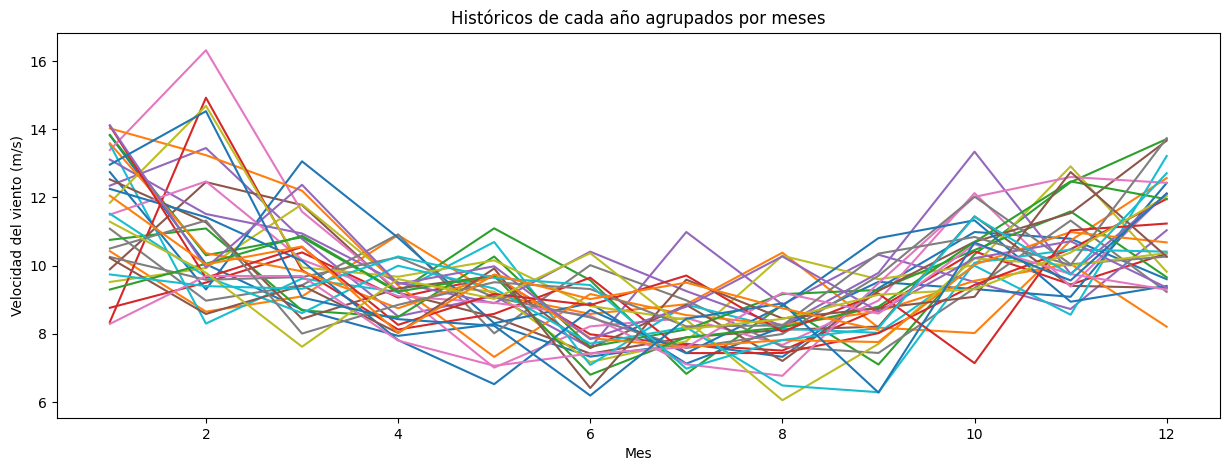

In [64]:
# Agrupar los datos por 'Año' y 'Mes', y calcular las medias
monthly = df.groupby(['Año', 'Mes']).mean().reset_index()

# Pivotar el DataFrame para tener los meses como columnas y los años como filas
pivoted = monthly.pivot(index='Año', columns='Mes', values='Velocidad_viento')

# Mostrar el DataFrame pivotado
print(pivoted.head())

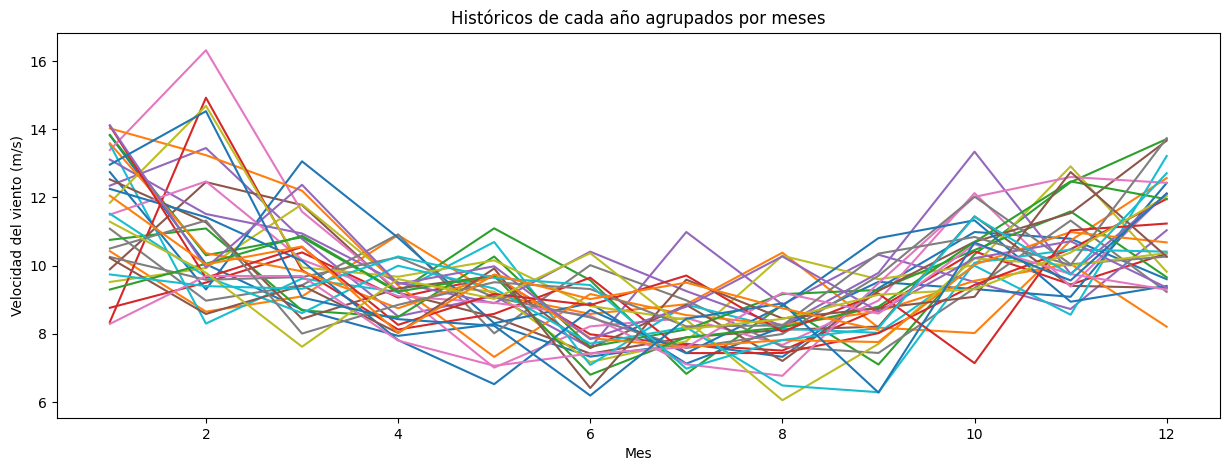

In [62]:
#Código para el 6to ejercicio
monthly = df.groupby(['Año', 'Mes']).mean().reset_index()

#Pivotar el DataFrame para tener los meses como columnas y los años como filas
pivoted = monthly.pivot(index='Año', columns='Mes', values='Velocidad_viento')

#Transponiendo el DataFrame
transposed = pivoted.T

#Graficar
transposed.plot(figsize=(15, 5), legend=False)

#Etiquetas
plt.xlabel('Mes')
plt.ylabel('Velocidad del viento (m/s)')
plt.title('Históricos de cada año agrupados por meses')

# Mostrar la gráfica
plt.show()